In [1]:
import torch
import numpy as np

In [2]:
np.set_printoptions(precision=3)

In [3]:
a = [1,2,3]
b = np.array([4,5,6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

In [4]:
print(t_a)

tensor([1, 2, 3])


In [5]:
print(t_b)

tensor([4, 5, 6], dtype=torch.int32)


In [6]:
t_ones = torch.ones(2,3)

t_ones.shape

torch.Size([2, 3])

In [7]:
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [8]:
# finally, creating a tensor of random values can be done as follows:
rand_tensor = torch.rand(2,3)
print(rand_tensor)

tensor([[0.7925, 0.4895, 0.9319],
        [0.3561, 0.6871, 0.6209]])


Manipulating the data type and shape of a tensor:
- Learning ways to manipulate tensors is necessary to make them compatible for input to a model or an operation. We now learn how to manipulate tensor data types and shapes via several pytorch functions that cast, reshape, transpose, and squeeze (remove dimensions):

In [9]:
t_a_new = t_a.to(torch.int64)

In [10]:
print(t_a_new.dtype)

torch.int64


Modifying the dimensions of a tensor:

In [11]:
t = torch.rand(3,5)
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


Reshaping a tensor (for example, from 1D vector to a 2D array):

In [12]:
t

tensor([[0.1506, 0.1963, 0.9532, 0.0276, 0.8701],
        [0.6750, 0.9803, 0.6464, 0.7141, 0.3416],
        [0.6397, 0.0792, 0.0359, 0.9975, 0.9367]])

In [13]:
t_tr

tensor([[0.1506, 0.6750, 0.6397],
        [0.1963, 0.9803, 0.0792],
        [0.9532, 0.6464, 0.0359],
        [0.0276, 0.7141, 0.9975],
        [0.8701, 0.3416, 0.9367]])

Reshaping a tensor - from 1D to 2D:

In [14]:
t = torch.zeros(30)
t_reshape = t.reshape(5,6)

In [15]:
t_reshape.shape

torch.Size([5, 6])

Removing unnecessary dimensions:

In [16]:
t = torch.zeros(1,2,1,4,1)

In [17]:
t.shape

torch.Size([1, 2, 1, 4, 1])

In [18]:
t_sqz = torch.squeeze(t, 2)

In [19]:
print(t_sqz.shape)

torch.Size([1, 2, 4, 1])


In [20]:
torch.squeeze(t, [0,2,4]).shape

torch.Size([2, 4])

**Applying Mathematical Operations to tensors:**
- Applying math operations - in particular linear algebra is necessary for building most ml models. In the next section -> cover some widely used linear algebra operations, such as element-wise product, matrix multiplication, and computing the norm of a tensor.
- First, let's instantiate two random tensors, one with uniform idstribution in the range (-1,1) and another with a normal distribution

In [21]:
torch.manual_seed(1)

In [22]:
t1 = 2 * torch.rand(5,2) - 1
t2 = torch.normal(mean=0, std=1, size=(5,2))

Note: torch.rand returns a tensor filled with random numbers from a uniform distribution in the range (0,1). torch.multiply computes the element-wise multiplication of the two tensors:

In [23]:
t3 = torch.multiply(t1,t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


To then compute the mean, sum, and standard deciation along a certain axis, torch,mean, sum, std

In [24]:
t4 = torch.mean(t1, axis=0)

In [25]:
t4

tensor([-0.1373,  0.2028])

The matrix-matrix product on the other hand can be computed using torch.matmul as follows:

In [26]:
t5 = torch.matmul(t1, torch.transpose(t2,0,1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


computing the matrix multiplication the other way round can be done as follows:

In [27]:
t6 = torch.matmul(torch.transpose(t1,0,1), t2)

In [28]:
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


Finally, the torch.linalg.norm() function is useful for computing the Lp norm of a tensor. for example, we can calculate the L2 norm of t1 as follows:

In [29]:
t1

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])

In [30]:
norm_t1 = torch.linalg.norm(t1, ord=2, dim=1)

In [31]:
norm_t1

tensor([0.6785, 0.5078, 1.1162, 0.5488, 0.1853])

To confirm that that norm computation is correct, verify with the followng code:

In [32]:
t1

tensor([[ 0.5153, -0.4414],
        [-0.1939,  0.4694],
        [-0.9414,  0.5997],
        [-0.2057,  0.5087],
        [ 0.1390, -0.1224]])

In [33]:
np.sqrt(np.sum(np.square(t1.numpy()), axis=1))

array([0.678, 0.508, 1.116, 0.549, 0.185], dtype=float32)

**Split, Stack, and concatenate tensors:**
- We now cover pytorch operations for splitting a tensor into multiple tensors or the reverse: stacking and concatenating multiple tensors into a single one
- Assume we have a single tensor and we want to split it into two or more tensors, for this pytorch provides a convenient torch.chunk() function, which divides an input tensor into a list of equally sized tensors. we can determine the desired number of splits as an integer using the chunks argument to split a tensor along the desired dimension specified by the dim argument. In this case, the total size of the input tensor along the specified dimension must be divisible by the desired number of splits.

- Providing the number of splits:

In [34]:
torch.manual_seed(1)

t = torch.rand(6)

print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293, 0.7999])


In [35]:
t_splits = torch.chunk(t, 3)

In [36]:
print(t_splits)

(tensor([0.7576, 0.2793]), tensor([0.4031, 0.7347]), tensor([0.0293, 0.7999]))


In [37]:
z = torch.rand(4,3)

In [38]:
z_splits = torch.chunk(z, chunks=2, dim=0)

In [39]:
z_splits

(tensor([[0.3971, 0.7544, 0.5695],
         [0.4388, 0.6387, 0.5247]]),
 tensor([[0.6826, 0.3051, 0.4635],
         [0.4550, 0.5725, 0.4980]]))

In [40]:
[item.numpy() for item in z_splits]

[array([[0.397, 0.754, 0.57 ],
        [0.439, 0.639, 0.525]], dtype=float32),
 array([[0.683, 0.305, 0.464],
        [0.455, 0.572, 0.498]], dtype=float32)]

If the size of the dim isn't divisible by the number of chunks, then the last chunk will be smaller.

- Providing the sizes of different splits:
- Alternatively, instead of defining the number of splits, we can also specify the sizes of the output tensors directly. 

In [41]:
torch.manual_seed(1)

In [42]:
t = torch.rand(5)

In [43]:
print(t)

tensor([0.7576, 0.2793, 0.4031, 0.7347, 0.0293])


In [44]:
t_splits = torch.split(t, split_size_or_sections=[3,2])

In [45]:
t_splits

(tensor([0.7576, 0.2793, 0.4031]), tensor([0.7347, 0.0293]))

Sometimes, we're working with multiple tensors and need to concatenate them or stack them to create a single tensor. in this case: pytorch functions such as torch.stack() and torch.cat() come in handy. 

In [46]:
A = torch.ones(3)
B = torch.zeros(2)
C = torch.cat([A,B], axis=0)
print(C)

tensor([1., 1., 1., 0., 0.])


If we create 1D tensors A and B, both will be size 3, then we can stack them together to form a 2D tensor, S:

In [47]:
A = torch.ones(3)
B = torch.zeros(3)
S = torch.stack([A, B], axis=1)

In [48]:
print(S)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.]])


**Building Input Pipelines in Pytorch:**
- torch.nn is a module for building nn models
- For cases where the training dataset is rather small and can be loaded as a tensor into memory, we can directly use this tensor for training. 
- For typical usecases however, the dataset is too large to fit into computer memory. 
- we therefore need to load the data from the main storage device (for example hard drive or solid-state drive) in chunks, i.e. batch by batch. 
- In addition, we may need to construct a data-processing pipeline to apply certain transformations and preprocessing steps to our data, such as mean centering, scaling, or adding noise to augment the training procedure and prevent overfitting.
- Applying preprocessing functions manually everytime can become cumbersome. Luckily, pytorch provides a special class for constructing efficient and convenient processing pipelines. In this section - we see an overview of different methods for constructing a pytorch dataset and dataloader, and implementing data loading, shuffling, and batching

**Creating a Pytorch DataLoader from existing tensors:**

If the data already exists in the form of a tensor object, a python list, or a numpy array, we can easily create a dataset loader using the torch.utils.data.DataLoader() class. it returns an object of the DataLoader class, which we can use to iterate through the individual elements in the input dataset. 

In [49]:
from torch.utils.data import DataLoader

In [50]:
t = torch.arange(6, dtype=torch.float32)

In [51]:
data_loader = DataLoader(t)

In [52]:
for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


If we want to create batches from this dataset, with a desired batch size of 3, we can do this using the batch_size argument as follows:

In [53]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

In [54]:
for i, batch in enumerate(data_loader,1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


Last optional argument drop_last is useful for cases when the number of elements in the tensor is not divisible by the desired batch size. We can drop the last non-full batch by setting drop_last to true. We can always iterate through a dataset directly, but as seen above - DataLoader provides an automatic and customizable batching to a dataset:

**Combining two tensors into a joint dataset:**
- Often we have the data in two (or possibly more) tensors. For example, we could have a tensor for features and a tensor for labels. In such cases - we need to build a dataset that combines these tensors, which will allows us to retrieve the elements of these tensors in tuples.

In [55]:
torch.manual_seed(1)

In [56]:
t_x = torch.rand([4,3], dtype=torch.float32)
t_y = torch.arange(4)

Now, we want to create a joint dataset from these two tensors, we first need to create a Dataset class as follows:

In [57]:
from torch.utils.data import Dataset

In [58]:
class JointDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

A custom dataset class must contain the following methods to be used by the dataloader later on:
- __init__(): => this is where the initial logic happens, such as reading exising arrays, loading a file, filtering data and so forth
- __getitem__(): => this returns the corresponding sample to the goven index

then, we now create a joint dataset of t_x and t_y with the custom dataset as follows:

In [59]:
from torch.utils.data import TensorDataset

In [60]:
joint_dataset = TensorDataset(t_x,t_y)

In [61]:
for example in joint_dataset:
    print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


In [62]:
joint_dataset2 = JointDataset(t_x,t_y)

In [63]:
for example in joint_dataset2:
    print(' x: ', example[0], ' y: ', example[1])

 x:  tensor([0.7576, 0.2793, 0.4031])  y:  tensor(0)
 x:  tensor([0.7347, 0.0293, 0.7999])  y:  tensor(1)
 x:  tensor([0.3971, 0.7544, 0.5695])  y:  tensor(2)
 x:  tensor([0.4388, 0.6387, 0.5247])  y:  tensor(3)


**Shuffle, Batch, and Repeat:**
- As earlier mentioned, when training a NN model using stochastic gradient descent optimization, it is important to feed training data as randomly shuffled batches. We've already seen how to specify the batch size using a data loader object.

In [64]:
torch.manual_seed(1)

data_loader = DataLoader(dataset=joint_dataset2, batch_size=2, shuffle=True)

Now, here, each batch contains 2 data records (x), and the corresponding labels y. Now, we iterate through the data loader entry by entry as follows:

In [65]:
for i,batch in enumerate(data_loader, 1):
    print(f'batch {i}:','x: ', batch[0], '\n y: ', batch[1])

batch 1: x:  tensor([[0.3971, 0.7544, 0.5695],
        [0.7576, 0.2793, 0.4031]]) 
 y:  tensor([2, 0])
batch 2: x:  tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y:  tensor([1, 3])


rows are shuffled w/o losing the one-to-one correspondence between the entries in x and y. In addition, when training a model for multiple epochs, we need to shuffle and iterate over the dataset by the desired number of epochs. so lets iterate over the batched dataset twice:

In [66]:
for epoch in range(2):
    print(f'epoch {epoch+1}')
    for i,batch in enumerate(data_loader,1):
        print(f'batch {i}:', 'x:', batch[0],'\n y:',batch[1])

epoch 1
batch 1: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([0, 2])
batch 2: x: tensor([[0.7347, 0.0293, 0.7999],
        [0.4388, 0.6387, 0.5247]]) 
 y: tensor([1, 3])
epoch 2
batch 1: x: tensor([[0.4388, 0.6387, 0.5247],
        [0.3971, 0.7544, 0.5695]]) 
 y: tensor([3, 2])
batch 2: x: tensor([[0.7576, 0.2793, 0.4031],
        [0.7347, 0.0293, 0.7999]]) 
 y: tensor([0, 1])


**Creating a dataset from files on your local storage:**
- In this section, we now build a dataset from image files stored on disk. There's an image folder associated with the online 

In [67]:
import pathlib

In [68]:
imgdir_path = pathlib.Path('../data/cat_dog_images')

In [73]:
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

In [74]:
print(file_list)

['..\\data\\cat_dog_images\\cat-01.jpg', '..\\data\\cat_dog_images\\cat-02.jpg', '..\\data\\cat_dog_images\\cat-03.jpg', '..\\data\\cat_dog_images\\dog-01.jpg', '..\\data\\cat_dog_images\\dog-02.jpg', '..\\data\\cat_dog_images\\dog-03.jpg']


Next, we visualize all these images using matplotlib:

In [76]:
import matplotlib.pyplot as plt 
import os 
from PIL import Image

Image shape: (900, 1200, 3)
Image shape: (900, 1200, 3)
Image shape: (900, 742, 3)
Image shape: (800, 1200, 3)
Image shape: (800, 1200, 3)
Image shape: (900, 1200, 3)


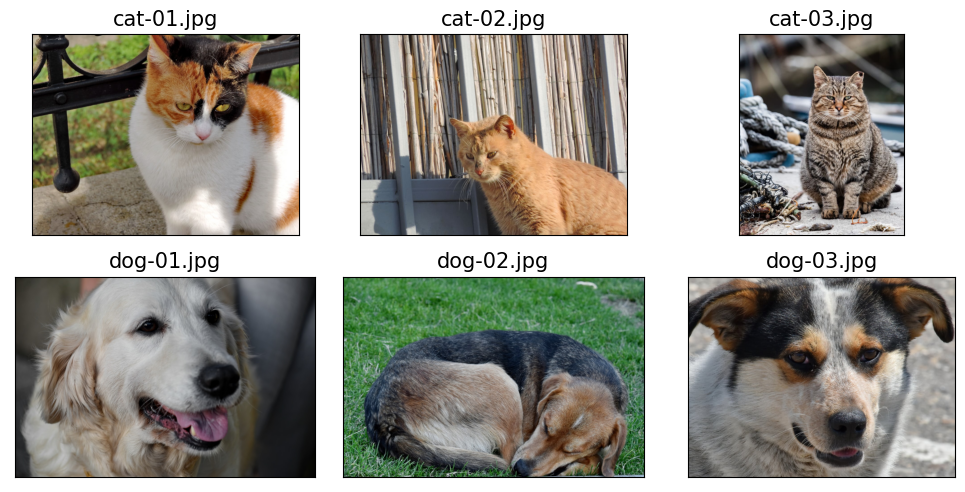

In [77]:
fig = plt.figure(figsize=(10,5))
for i, file in enumerate(file_list):
    img = Image.open(file)
    print('Image shape:', np.array(img).shape)
    ax = fig.add_subplot(2,3,i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)
plt.tight_layout()
plt.show()

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


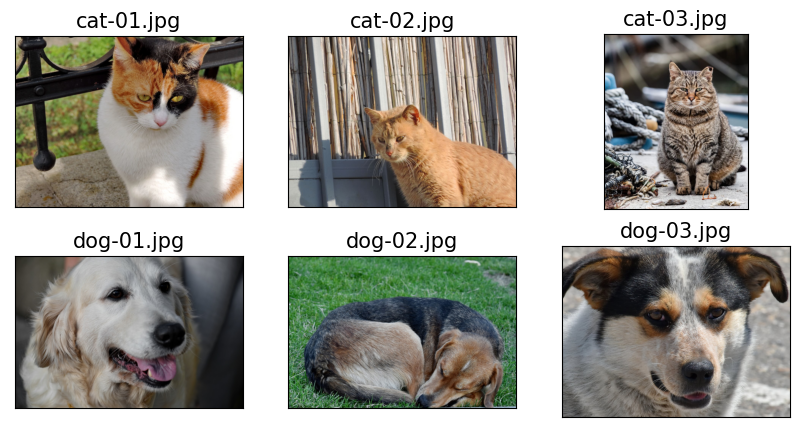

In [82]:
fig, ax = plt.subplots(2,3, figsize=(10,5))
counter = 0
for i in range(2):
    for j in range(3):
        img = Image.open(file_list[counter])
        print('Image shape: ', np.array(img).shape)
        ax[i,j].imshow(img)
        ax[i,j].set_xticks([]); ax[i,j].set_yticks([])
        ax[i,j].set_title(os.path.basename(file_list[counter]), size=15)
        counter+=1


from the viz, we can see the images have different aspect ratios. 

we can create the labels from the filenames:

In [83]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]

In [84]:
labels

[0, 0, 0, 1, 1, 1]

In [85]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels):
        self.file_list = file_list
        self.labels = labels
    
    def __getitem__(self, index):
        file = self.file_list[index]
        label = self.labels[index]
        return file, label
    def __len__(self):
        return len(self.labels)

In [86]:
image_dataset = ImageDataset(file_list, labels)

for file, label in image_dataset:
    print(file, label)

..\data\cat_dog_images\cat-01.jpg 0
..\data\cat_dog_images\cat-02.jpg 0
..\data\cat_dog_images\cat-03.jpg 0
..\data\cat_dog_images\dog-01.jpg 1
..\data\cat_dog_images\dog-02.jpg 1
..\data\cat_dog_images\dog-03.jpg 1


Next, we need to apply transformations to this dataset: load the image content from its file path, decode the raw content, and resize it to a desired size. We use the torchvision.transforms module to resize the images and convert the loaded pixels into tensors as follows:

In [87]:
import torchvision.transforms as transforms

In [88]:
img_height, img_width = 80, 120

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width))
])

In [89]:
class ImageDataset(Dataset):
    def __init__(self, file_list, labels, transform=None):
        self.file_list = file_list
        self.labels = labels
        self.transform = transform
    
    def __getitem__(self, index):
        img = Image.open(self.file_list[index])
        if self.transform is not None:
            img = self.transform(img)
        label = self.labels[index]
        return img, label 
    
    def __len__(self):
        return len(self.labels)


image_dataset = ImageDataset(file_list, labels, transform)

In [99]:
z,x = image_dataset[0]

In [94]:
z = z.numpy()

Finally, we visualize the transformed images using matplotlib:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


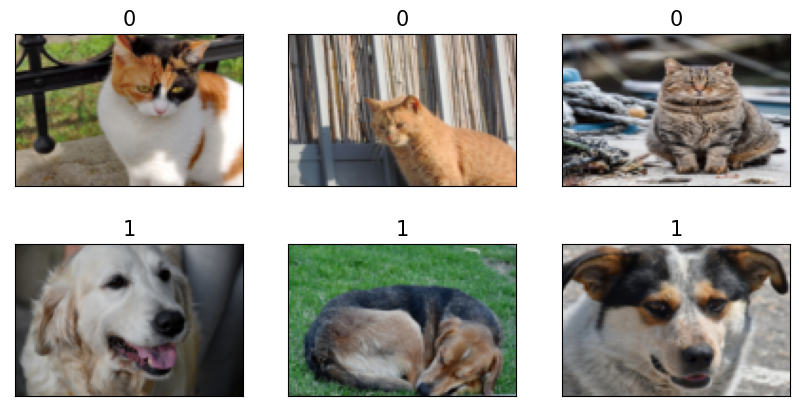

In [98]:
fig, ax = plt.subplots(2,3,figsize=(10,5))

counter = 0

for i in range(2):
    for j in range(3):
        imge,label = image_dataset[counter]
        ax[i,j].imshow(imge.numpy().transpose((1,2,0)))
        ax[i,j].set_title(str(label), size=15)
        ax[i,j].set_xticks([]); ax[i,j].set_yticks([])
        counter+=1

**Fetching available datasets from the torchvision.datasets library:**
- we are going to look at the celeba and mnist datasets here:

we will call the torchvision.datasets.celeba class to download the data, store it on disk in a designated folder and load it into a torch.utils.data.Dataset object:

In [103]:
import torchvision

In [105]:
image_path = '../data/celeb_a_dataset'

celeba_dataset = torchvision.datasets.CelebA(
    image_path, split='train', target_type='attr', download=True
)

FileURLRetrievalError: Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM

but Gdown can't. Please check connections and permissions.